# MA3832 A2 - Language Detection
Done by: Josiah Teh, Pai Hwai, Ellen Dinata Jo

## Our Approach
From the instructions given, it established that our main goal was to develop a language recognition model that would be able to differenciate between multiple languages. Using the csv data given, we used the kullback leibler divergence metric as our preferred method of measurement, in agreement with the suggestion given in the report provided.

The key points of our model development can be broken down into points:
- Early data analysis showed that while there were only 21 rows of data, each column contained a significant amount of string data that could be separated into multiple smaller rows for testing and training.
- Normal nlp preprocessing stages such as tokenization, lemmatization and stop word removal were *NOT* performed as the main goal was to detect the language of a sentence, not the parts of speech or the sentimental value.
- Blank spaces and punctuation were not removed, but rather treated as characters, as these used in conjunction with bigrams would prove useful in detecting word or sentence endings, as well as the startings. 
- Unigram and bigrams of characters were created via a count vectorizer, followed by analysis on the occurences within in the categories to determine which was the best. 
- A selection of the most significant grams were used to develop our final language dictionary instead of all in order to reduce computing power. 
- Evaluations of the model at the end showed that while the model was capable correctly classifying texts according to their language, it had issues with classifying named entities such as countries and people, while also not being able to predict sentences spelt phonetically in roman characters rather than the actual language (e.g. izrecheniya instead of изречения will be classified incorrectly). It can also be noted that short sentences have a higher chance of being misclassified.

## Data Pre-Processing 

In [1]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sn
import matplotlib.pyplot as plt
import textwrap

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("formatted_data.csv", on_bad_lines='skip', sep = ";")
print(f"Shape of Data: {data.shape}")

Shape of Data: (21, 3)


In [3]:
data

,language,text,length_text
0,bg,Състав на Парламента: вж. протоколиОдобряване ...,327263
1,cs,Schválení zápisu z předchozího zasedání: viz z...,317927
2,da,Genoptagelse af sessionenJeg erklærer Europa-P...,678400
3,de,Wiederaufnahme der SitzungsperiodeIch erkläre ...,747690
4,el,Επαvάληψη της συvσδoυΚηρύσσω την επανάληψη της...,523277
5,en,Resumption of the sessionI declare resumed the...,690268
6,es,Reanudación del período de sesionesDeclaro rea...,733658
7,et,Eelmise istungi protokolli kinnitamine vaata p...,324119
8,fi,Istuntokauden uudelleenavaaminen Julistan perj...,694523
9,fr,Reprise de la sessionJe déclare reprise la ses...,756201


In [4]:
data['text'][0]

'Състав на Парламента: вж. протоколиОдобряване на протокола от предишното заседание: вж протоколитеСъстав на Парламента: вж. протоколиПроверка на пълномощията: вж. протоколиВнасяне на документи: вж. протоколиВъпроси с искане за устен отговор и писмени декларации внасяне: вж. протоколаПетиции: вж. протоколиПредаване на текстове на споразумения от Съвета: вж. протоколиДействия, предприети вследствие резолюции на Парламента: вж. протоколаДневен ред на следващото заседание: вж. протоколиЗакриване на заседаниетоSe levanta la sesión a las 19.45 horasИзбор на заместник-председатели на Европейския парламент срок за депозиране на кандидатури: вж. протоколаDie Sitzung wird um 12.40 Uhr unterbrochen und um 15.00 Uhr wiederaufgenommen.Избор на квестори на Европейския парламент срок за депозиране на кандидатури: вж. протоколаDie Sitzung wird um 15.25 Uhr unterbrochen und um 18.00 Uhr wiederaufgenommen.Дневен ред на следващото заседание: вж. протоколиЗакриване на заседаниетоDie Sitzung wird um 18.15

In [44]:
for i in range(21):
    print(len(data.iloc[i, 1]))

327263
317927
678400
747690
523277
690268
733658
324119
694523
756201
330524
729712
318875
323079
718181
317026
730576
336424
328185
308136
674945


As the length of the text is notably long, we will split each row into 1000 rows and add them to a new dataframe.

In [45]:
for i in range(21):
    text_raw = data.iloc[i, 1]
    n = int((data.iloc[i, 2]/1000) + 1)
    data.at[i, 'text'] = (textwrap.wrap(text_raw, n))

In [47]:
data.head()

,language,text,length_text
0,bg,[Състав на Парламента: вж. протоколиОдобряване...,327263
1,cs,[Schválení zápisu z předchozího zasedání: viz ...,317927
2,da,[Genoptagelse af sessionenJeg erklærer Europa-...,678400
3,de,[Wiederaufnahme der SitzungsperiodeIch erkläre...,747690
4,el,[Επαvάληψη της συvσδoυΚηρύσσω την επανάληψη τη...,523277


In [46]:
for i in range(21):
    print(len(data.iloc[i, 1]))

1008
1010
1004
1005
1004
1003
1003
1011
1006
1003
1010
1004
1011
1008
1003
1009
1004
1008
1008
1008
1005


In [5]:
# Explode the dataframe and reset the index
data = data.explode('text')
data = data.reset_index(drop=True)

# Drop the length_text column
data = data.drop('length_text', axis = 1)
print(f"Shape of Data: {data.shape}")

Shape of Data: (21135, 2)


In [6]:
data.head()

,language,text
0,bg,Състав на Парламента: вж. протоколиОдобряване ...
1,bg,на споразумения от Съвета: вж. протоколиДейств...
2,bg,протоколаDie Sitzung wird um 12.40 Uhr unterbr...
3,bg,заседаниетоDie Sitzung wird um 18.15 Uhr gesch...
4,bg,"seduta, sospesa alle 19.00, è ripresa alle 21...."


### Language Code - Forms
- bg: Bulgarian
- cs: Czech
- da: Danish
- de: German
- el: Greek 
- en: English
- es: Spanish
- et: Estonian
- fi: Finnish
- fr: French
- hu: Hungarian
- it: Italian
- lt: Lithuanian
- lv: Latvian
- nl: Dutch
- pl: Polish
- pt: Portuguese 
- ro: Romanian
- sk: Slovak
- sl: Slovenian
- sv: Swedish 

In [7]:
# save a list of all the languages
languages = set(data['language'])

In [8]:
# Set X and Y
x = data['text']
y = data['language']

# Separate data into train and test, 80-20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Check dimensions
print(f"Shape of x train:{x_train.shape}")
print(f"Shape of x test:{x_test.shape}")
print(f"Shape of y train:{y_train.shape}")
print(f"Shape of y test:{y_test.shape}")

Shape of x train:(16908,)
Shape of x test:(4227,)
Shape of y train:(16908,)
Shape of y test:(4227,)


## Vectorization (Unigrams)

We will manually create our own dictionary containing the vectors of each character to the language

In [9]:
# Create vectors from chars 
uni_cv = CountVectorizer(analyzer='char', ngram_range=(1,1)) # ngram_range(1,1) separates the words by 1
x_unigram_train = uni_cv.fit_transform(x_train)
x_unigram_test = uni_cv.transform(x_test)
# use get_feature_names as get_feature_names_out gives a nparray, not allowing for indexing
y_unigram = uni_cv.get_feature_names()
print(f"Number of unigrams in dictionary: {len(y_unigram)}")
# print(np.array(x_unigram))

Number of unigrams in dictionary: 199


In [10]:
# Create function to create language dictionary, setting unigrams to y labels
def create_dict(x, y):
    dict = {}
    if type(x) is not np.ndarray:
        x = x.toarray()
    for i in range(len(y)):
        lang = y[i]
        v = np.array(x[i])
        if not lang in dict:
            dict[lang] = v
        else:
            dict[lang] += v
    # Scale the values
    for lang in dict:
        v = dict[lang]
        dict[lang] = v / np.sum(v)
    return dict

unigram_dict = create_dict(x_unigram_train, y_train.values)

The function above appends the vectorized values to the related character via a numpy array. However, in this step characters that have no significance are also present (having a score approximating 0), so we will then need to write a function to get rid of all non significant characters

In [11]:
def get_important_chars(y_features, dict, significance = 1e-5):
    new_dict = {}
    for i in languages:
        chars = []
        new_dict[i] = chars
        v = dict[i]
        for j in range(len(v)):
            if v[j] > significance:
                chars.append(y_features[j])
    return new_dict

unigram_dict_relevant = get_important_chars(y_unigram, unigram_dict)

# Check values per language
for i in languages:    
    print(f"{i}: {len(unigram_dict_relevant[i])}")

cs: 102
en: 52
da: 52
et: 93
pt: 64
sl: 84
lt: 99
el: 80
pl: 99
lv: 106
it: 56
es: 60
sv: 51
ro: 97
fi: 49
bg: 123
sk: 103
hu: 94
fr: 60
nl: 52
de: 52


From the output above, we can see that while languages such as scandanavian and bulgarian have many identifying unigrams, languages that mainly use roman characters such as danish and dutch tend to struggle more, with a much lower unigram dictionary count. We will visualise the relations between languages with low dictionary counts and their most significant characters.

In [12]:
# Visualize relationship between languages with 52 or less characters
low_languages = ['da', 'de', 'en', 'fi', 'nl', 'sv']

# Get only characters that are the most common, then collect and sort them
lowchars_topsignif = get_important_chars(y_unigram, unigram_dict, 1e-2)
low_chars = []
for i in low_languages:
    low_chars += lowchars_topsignif[i]
    low_chars = list(set(low_chars))
    low_chars.sort()

print(low_chars)

[' ', ',', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', 'ä', 'å', 'ö']


In [13]:
# build dataframe to visualise relationship
indexes = [y_unigram.index(i) for i in low_chars]
data_built = [unigram_dict[i][indexes] for i in low_languages]
df = pd.DataFrame(np.array(data_built).T, columns = low_languages, index = low_chars)
df.index.name = "Characters"
df.columns.name = "Languages"
df.head()

Languages,da,de,en,fi,nl,sv
Characters,,,,,,
,0.151488,0.134885,0.164600,0.109678,0.152604,0.148573
",",0.012851,0.010554,0.009376,0.009898,0.005732,0.006170
a,0.043522,0.043197,0.060923,0.095844,0.057128,0.077574
b,0.010078,0.016224,0.010901,0.000494,0.012651,0.008901
c,0.002626,0.023907,0.027104,0.000417,0.012441,0.008976


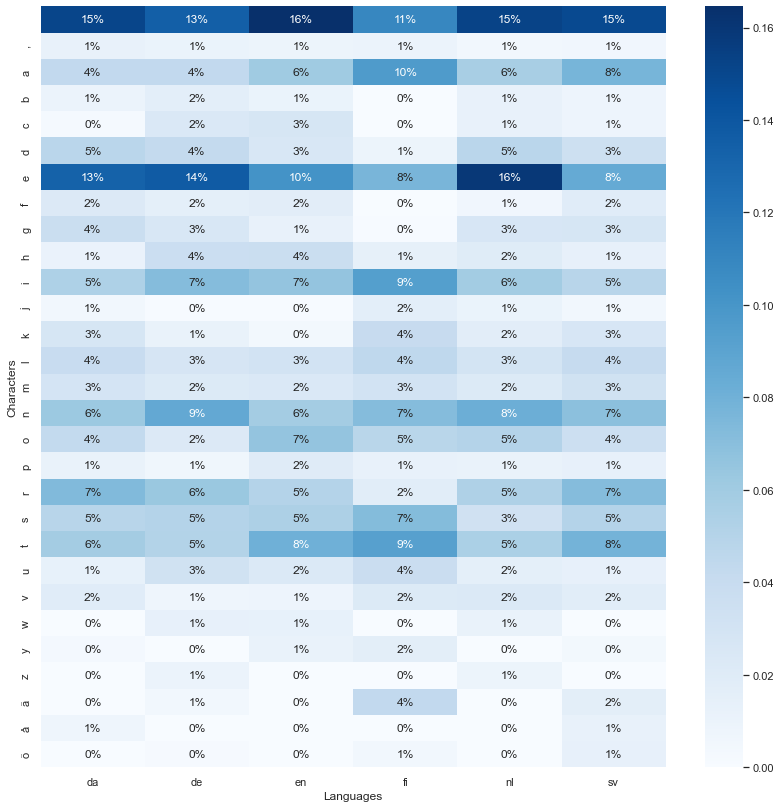

In [14]:
# Plot data
sn.set(rc={'figure.figsize':(14, 14)})
sn.heatmap(df, cmap="Blues", annot=True, annot_kws={"size": 12}, fmt='.0%')# font size
plt.show()

Visually, we can see that most characters are closely related in their level of significance, which in turn will result in a much higher rate of misclassification. With this in mind, we decided to use bigrams for our language dictionary training.

## Vectorization (Bigrams)

In [15]:
bigram_cv = CountVectorizer(analyzer='char', ngram_range=(2,2)) 
x_bigram_train = bigram_cv.fit_transform(x_train)
x_bigram_test = bigram_cv.transform(x_test)

# use get_feature_names as get_feature_names_out gives a nparray, not allowing for indexing
y_bigram = bigram_cv.get_feature_names()
print(f"Number of bi-grams in training set: {len(y_bigram)}")

Number of bi-grams in training set: 5933


There is a much higher number of bigrams than there are of unigrams. 

In [16]:
# Create dictionary, and store only relevant characters from bigram
bigram_dict = create_dict(x_bigram_train, y_train.values)
bigram_dict_relevant = get_important_chars(y_bigram, bigram_dict, significance = 1e-3)

# Check values per language
sum = 0
for i in languages:    
    print(f"{i}: {len(bigram_dict_relevant[i])}")
    sum += len(bigram_dict_relevant[i])
print(f"Number of bi-grams: {sum}")

cs: 241
en: 196
da: 188
et: 199
pt: 182
sl: 203
lt: 208
el: 213
pl: 210
lv: 213
it: 187
es: 174
sv: 192
ro: 197
fi: 199
bg: 185
sk: 229
hu: 234
fr: 187
nl: 176
de: 184
Number of bi-grams: 4197


As the total number significant bigrams detected are 4202, the total computational time would be excessively high, as in the cases of our training set, the model would need to compute through 16908 rows by 4202 features of data. In order to reduce this, we will be only using the top 100 most significant values of each language, thereby giving us a maximum of 2100 features. 

## Language Dictionary 

In [17]:
# Repurpose function 
def get_top_chars(dict_features, dict, top=100):
    new_dict = {}
    for i in y:
        chars = []
        new_dict[i] = chars
        v = dict[i]
        sorted = (-v).argsort()[:top]
        for j in range(len(sorted)):
            chars.append(dict_features[sorted[j]])
    return new_dict

# Repurpose bigram count vectorizer to get only those with a significant value above 1e-3
bigram_cv = CountVectorizer(analyzer='char', ngram_range=(2,2), min_df = 1e-3) 
x_bigram_train = bigram_cv.fit_transform(x_train)
x_bigram_test = bigram_cv.transform(x_test)

# Get labels
y_bigram = bigram_cv.get_feature_names_out()

In [18]:
bigram_dict_important = create_dict(x_bigram_train, y_train.values)
bigram_dict_top100 = get_top_chars(y_bigram, bigram_dict_important)

# Save all top 100 bigrams in a list
top100_per_language = []
for i in bigram_dict_top100:
    top100_per_language += set(bigram_dict_top100[i])

top100_unique = list(set(top100_per_language))
    
print('All items:', len(top100_per_language))
print('Unique items:', len(top100_unique))

All items: 2100
Unique items: 549


Effectively, we will be using only 549 features to predict the language of our model.

In [19]:
# Use top 100 unique to create indices to adjust train and test sets
def get_selected_index(all_features, target_features):
    column_indexes = []
    all_features = np.array(all_features)
    for i in target_features:
        column_indexes = np.append(column_indexes, np.where(all_features == i))
    return column_indexes.astype(int)

top100_index = get_selected_index(y_bigram, top100_unique)

print(f"Shape of Index Features: {top100_index.shape}")

Shape of Index Features: (549,)


In [20]:
# Use indices found to shape train and test data
x_top100_train = x_bigram_train.toarray()[:,top100_index]
x_top100_test = x_bigram_test.toarray()[:,top100_index]

# Check shapes 
print(f"train shape: {x_top100_train.shape}")
print(f"test shape: {x_top100_test.shape}")

train shape: (16908, 549)
test shape: (4227, 549)


In [21]:
# Normalize data for train and test
x_top100_train = normalize(x_top100_train)
x_top100_test = normalize(x_top100_test)

# set test set to relative, following what we do in the create_dict function
x_top100_test_relative = [v / np.sum(v) for v in x_top100_test]

# Create language dictionary from training set
language_dict = create_dict(x_top100_train, y_train.values)

## Kullback Leibler Divergence Model

Using the formula given in the document,$D \left(p \middle\| q \right) = \sum_{x\in{X}} p(x)\times log\frac{p(x)}{q(x)}$ we will construct our own kullback leibler model.

The way the model is designed to work is to calculated the kullback leibler divergence for each row of training data, to each row of testing data, depending on the most important features we have chosen. This model will then store these prediction values, and the divergence that is the smallest will be chosen as the predicted language.

In [22]:
# Create Kullback Liebler Divergence Model
def kl_model(dict, x_test):
    def divergence(p, q):
        p = np.array(p) + 1e-100 # We add 1e-100 to both p and q in the event q is equal to 0, causing a domain error
        q = np.array(q) + 1e-100
        return np.sum([p[i] * m.log(p[i]/q[i]) for i in range(len(p))])
    
    def predict(dict, v, lang):
        divs = [divergence(dict[i], v) for i in lang]
        # return the argument with the smallest value
        x = np.argmin(divs)
        return lang[x]
    
    lang = [i for i in dict]
    return [predict(dict, v, lang) for v in x_test]

In [23]:
# Run the model
predictions = kl_model(language_dict, x_top100_test_relative)

## Model Evaluation

In order to evaluate the model, the f1 score was calculated, or the harmonic mean between precision and recall, while a confusion matrix comparing the predicted to actual languages of the testing set were also made.

In [24]:
# Calculate f1 score
f1_micro = f1_score(y_test, predictions, average='micro')
f1_macro = f1_score(y_test, predictions, average='macro')
f1_weighted = f1_score(y_test, predictions, average='weighted')
print("-"*58,"F1 Scores","-"*58)
print(f"F1 Micro: {f1_micro*1e+2:.2f}%")
print(f"F1 Macro: {f1_macro*1e+2:.2f}%")
print(f"F1 Weighted: {f1_weighted*1e+2:.2f}%")
print("-"*127)

---------------------------------------------------------- F1 Scores ----------------------------------------------------------
F1 Micro: 98.98%
F1 Macro: 98.99%
F1 Weighted: 98.99%
-------------------------------------------------------------------------------------------------------------------------------


Very high F1 scores of 99% were observed in regards to our test set.

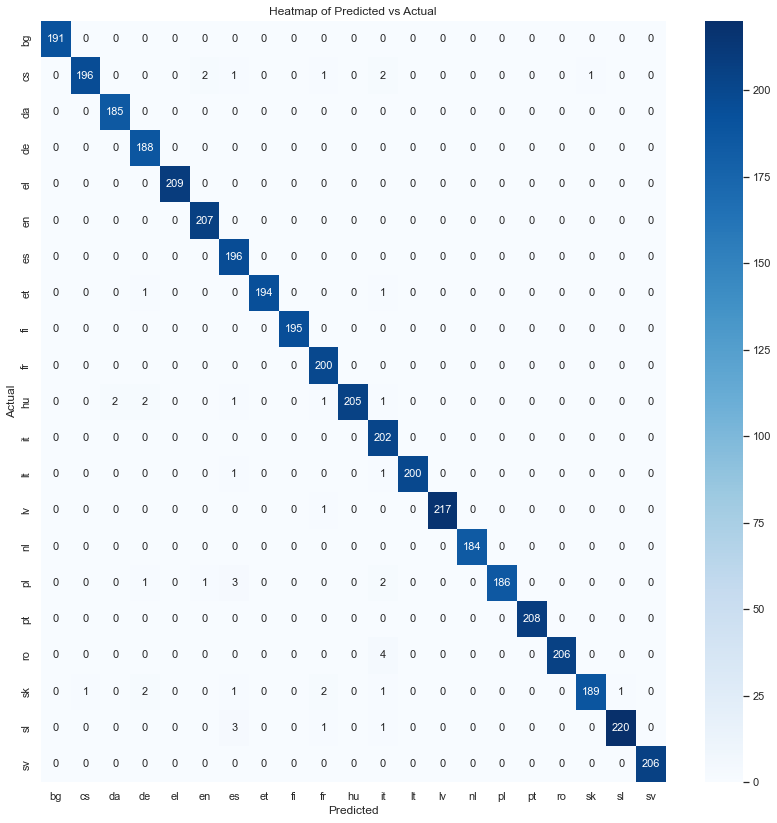

In [53]:
# Visualise data in a confusion matrix
allLabels = list(set(list(y_test) + list(predictions)))
allLabels.sort()
confusionMatrix = confusion_matrix(y_test, predictions, labels=allLabels)
unqiueLabel = np.unique(allLabels)
df_cm = pd.DataFrame(confusionMatrix, columns=unqiueLabel, index=unqiueLabel)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

sn.set(font_scale=0.9) # for label size
sn.set(rc={'figure.figsize':(14, 14)})
sn.heatmap(df_cm, cmap = "Blues", annot=True, annot_kws={"size": 11}, fmt='g').set(title = "Heatmap of Predicted vs Actual")# font size
plt.show()

The confusion matrix above demonstrates that the language prediction model has highly accurate predictions, as the language pair with the highest error count across the board (italian and romanian) had an error count of 4 while the model predicted correctly 202 times. The matrix shows that the errors are sparse and few, indicating that this is a good model with some limitations. To begin, the model can falsely predict languages when the test model's text contains fewer unique characters, and the likelihood of this false assumption increases when the test model has a shorter text input. More limitations we find are cognate words and words spelled phonetically rather than natively.

## Manual Testing

In [26]:
# Create function to recieve only 1 input of text and return predicted language
def lang_model(text, display = True):
    x_test = (normalize((bigram_cv.transform([text])).toarray()[:,top100_index]))
    pred = kl_model(language_dict, x_test)
    if display is True:
        print(f"Text: {text}")
    print(f"Predicted Language: {pred}")

In [27]:
# Test model - English(en)
lang_model("To receive free resources once a week together with my best offers.")

Text: To receive free resources once a week together with my best offers.
Predicted Language: ['en']


In [28]:
# Test Model - Bulgarian (bg)
lang_model("изречения")

Text: изречения
Predicted Language: ['bg']


In [29]:
# Test Model - Italian (it)
lang_model("scrisse che sarebbe arrivata presto")

Text: scrisse che sarebbe arrivata presto
Predicted Language: ['it']


In [30]:
# Test Model - French (fr)
lang_model("J’ai oublié mon parapluie dansl’abribus")

Text: J’ai oublié mon parapluie dansl’abribus
Predicted Language: ['fr']


In [31]:
# Test Model - Hungarian (hu)
lang_model("Ez a karóra ajándék volt a feleségemtől.")

Text: Ez a karóra ajándék volt a feleségemtől.
Predicted Language: ['hu']


## Live Demo 
As per the instructions request, a program short program will be written to assist in model testing. Enter any text to try and classify, or a blank input to end program.

In [54]:
print("-----Language Model Demo-----")
input_text = input(str("Enter Input: "))
while len(input_text) != 0:
    lang_model(input_text, display = False)
    print("-"*30)
    input_text = input(str("Enter Input:"))
print("Goodbye")

-----Language Model Demo-----
Enter Input: I want to go home and eat rice.
Predicted Language: ['en']
------------------------------
Enter Input:Potete offrire uno sconto migliore?
Predicted Language: ['it']
------------------------------
Enter Input:A madarak a kalitkában ülnek
Predicted Language: ['fi']
------------------------------
Enter Input:I go home.
Predicted Language: ['it']
------------------------------
Enter Input:
Goodbye
